*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

     |████████████████████████████████| 1.0MB 32.3MB/s 


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-07-08 02:22:40--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2021-07-08 02:22:40 (45.3 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


,age,sex,bmi,children,smoker,region,expenses,sex_category,smoker_category,region_category
1333,0.695652,male,0.404313,0.6,no,northwest,0.151299,1,0,1
1334,0.000000,female,0.428571,0.0,no,northeast,0.017305,0,0,0
1335,0.000000,female,0.563342,0.0,no,southeast,0.008108,0,0,2
1336,0.065217,female,0.264151,0.0,no,southwest,0.014144,0,0,3
1337,0.934783,female,0.353100,0.0,yes,northwest,0.447249,0,1,1


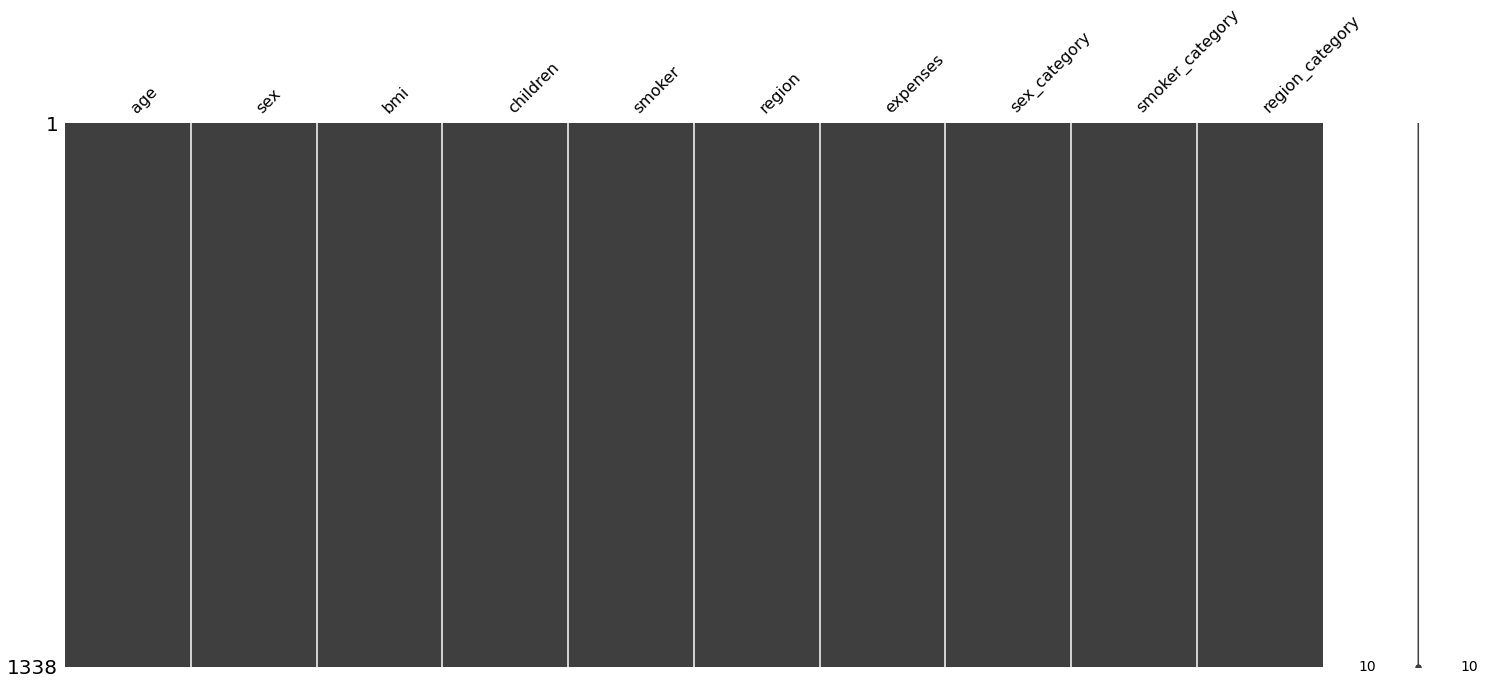

In [34]:
import missingno as msno
msno.matrix(dataset)


dataset.sex = pd.Categorical(dataset.sex)
dataset['sex_category'] = dataset.sex.cat.codes
dataset.smoker = pd.Categorical(dataset.smoker)
dataset['smoker_category'] = dataset.smoker.cat.codes
dataset.region = pd.Categorical(dataset.region)
dataset['region_category'] = dataset.region.cat.codes

# For normalization
# from sklearn.preprocessing import minmax_scale
# dataset[['age','bmi','expenses','children']] = minmax_scale(dataset[['age','bmi','expenses','children']])

dataset.tail()
# print(dataset['age'].value_counts())
# print(dataset['sex'].value_counts())
# print(dataset['bmi'].value_counts())
# print(dataset['children'].value_counts())
# print(dataset['smoker'].value_counts())
# print(dataset['region'].value_counts())
# print(dataset['expenses'].value_counts())

In [35]:
# import seaborn as sns
# sns.heatmap(dataset.isnull(), cbar=False)
x = dataset[['age', 'sex_category', 'bmi','children', 'smoker_category','region_category']]
y = dataset['expenses']
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, test_size = 0.2)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6)) #First hidden layer
model.add(tf.keras.layers.Dense(12)) #Second hidden layer
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(1)) #Output layer

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse'])
model.fit(train_dataset,train_labels, batch_size=32,epochs=100)
model.summary()



Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3035 - mae: 0.3035 - mse: 0.3588
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0859 - mae: 0.0859 - mse: 0.0182
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0869 - mae: 0.0869 - mse: 0.0193
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0719 - mae: 0.0719 - mse: 0.0133
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0779 - mae: 0.0779 - mse: 0.0148
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0719 - mae: 0.0719 - mse: 0.0137
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0775 - mae: 0.0775 - mse: 0.0158
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0802 - mae: 0.0802 - mse: 0.0162
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0772 - mae: 0.0772 - mse: 0.0153
Epoch 10/100
34/34 [========

9/9 - 0s - loss: 0.0629 - mae: 0.0629 - mse: 0.0124
Testing set Mean Abs Error:  0.06 expenses
You passed the challenge. Great job!


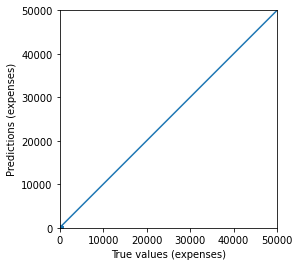

In [36]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
